In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

В датасете представлены данные страховых компаний по страхованию автомобилей. Ставится задача определения рисков наступления страхового случая в страховании транспортных средств (наступит или нет страховой случай).

In [2]:
path = r"Car_Insurance_Claim.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Всего имеется 19 признаков и 10000 исследуемых объектов.

Признаки имеют имена:
 - ID - индентификатор водителя
 - AGE - возраст
 - GENDER - пол
 - RACE - стиль вождения
 - DRIVING_EXPERIENCE - опыт вождения
 - EDUCATION - образование
 - INCOME - уровень дохода
 - CREDIT_SCORE - кредитный рейтинг
 - VEHICLE_OWNERSHIP - владение транспортным средством
 - VEHICLE_YEAR - год выпуска транспортного средства
 - MARRIED - нахождение в браке
 - CHILDREN - наличие детей
 - POSTAL_CODE - почтовый индекс
 - ANNUAL_MILEAGE - годовой пробег
 - VEHICLE_TYPE - тип транспортного средства
 - SPEEDING_VIOLATIONS - количество превышений скорости
 - DUIS - количество нарушений, связанных с вождением в нетрезвом виде
 - PAST_ACCIDENTS - количество предыдущих инцидентов
 - OUTCOME - исход (0 - не требуется страховая выплата, 1 - требуется)

Колонки 'ID' и 'POSTAL_CODE' никак не влияют на наступление страхового случая, поэтому можем убрать эти признаки.

In [4]:
del data['POSTAL_CODE']
del data['ID']

In [5]:
data.dtypes

AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

Переводим типы 'Object' в категориальный тип

In [6]:
data['VEHICLE_YEAR'] = data['VEHICLE_YEAR'].astype('category')
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].astype('category')
data['AGE'] = data['AGE'].astype('category')
data['GENDER'] = data['GENDER'].astype('category')
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['INCOME'] = data['INCOME'].astype('category')
data['RACE'] = data['RACE'].astype('category')
data['DRIVING_EXPERIENCE'] = data['DRIVING_EXPERIENCE'].astype('category')

In [7]:
(data['VEHICLE_YEAR'].dtype, 
data['VEHICLE_TYPE'].dtype,
data['AGE'].dtype,
data['GENDER'].dtype,
data['EDUCATION'].dtype,
data['INCOME'].dtype,
data['RACE'].dtype,
data['DRIVING_EXPERIENCE'].dtype)

(CategoricalDtype(categories=['after 2015', 'before 2015'], ordered=False),
 CategoricalDtype(categories=['sedan', 'sports car'], ordered=False),
 CategoricalDtype(categories=['16-25', '26-39', '40-64', '65+'], ordered=False),
 CategoricalDtype(categories=['female', 'male'], ordered=False),
 CategoricalDtype(categories=['high school', 'none', 'university'], ordered=False),
 CategoricalDtype(categories=['middle class', 'poverty', 'upper class', 'working class'], ordered=False),
 CategoricalDtype(categories=['majority', 'minority'], ordered=False),
 CategoricalDtype(categories=['0-9y', '10-19y', '20-29y', '30y+'], ordered=False))

In [8]:
data.dtypes

AGE                    category
GENDER                 category
RACE                   category
DRIVING_EXPERIENCE     category
EDUCATION              category
INCOME                 category
CREDIT_SCORE            float64
VEHICLE_OWNERSHIP       float64
VEHICLE_YEAR           category
MARRIED                 float64
CHILDREN                float64
ANNUAL_MILEAGE          float64
VEHICLE_TYPE           category
SPEEDING_VIOLATIONS       int64
DUIS                      int64
PAST_ACCIDENTS            int64
OUTCOME                 float64
dtype: object

# Визуализация данных и вычисление основных характеристик

Получим сводную информацию о количественных признаках. Найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей:

In [9]:
data.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Выводы:
Больше половины обратившихся в страховую компанию ранее не имели зафикированных превышений скорости, не попадали в страховые случаи и не были замечены в вождении в нетрезвом виде. При этом максимальное количество превышений скорости на одного человека = 22, максимальное количество вождений в нетрезвом виде = 6 и максимальное число попадания в ситуации, предусмотренные страховкой, = 15. Верхняя квартиль коэффициента, определяемого кредитной компанией, = 0.6 из максимально возможного 1. Самый высокий кредитный рейтинг = 0.96.

In [10]:
data.describe(include=['category'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Видим, что основная категория водителей, обратившихся в страховую компанию, - люди 26-39 лет, с маленьким водительским стажем - от 0 до 9ти лет. Большинство из них - женщины. 9523 машины из 10000 - седаны, а владельцы в основном являются представителями верхнего класса и окончившими старшую школу.

Построим все возможные диаграммы рассеивания для каждой пары переменных:

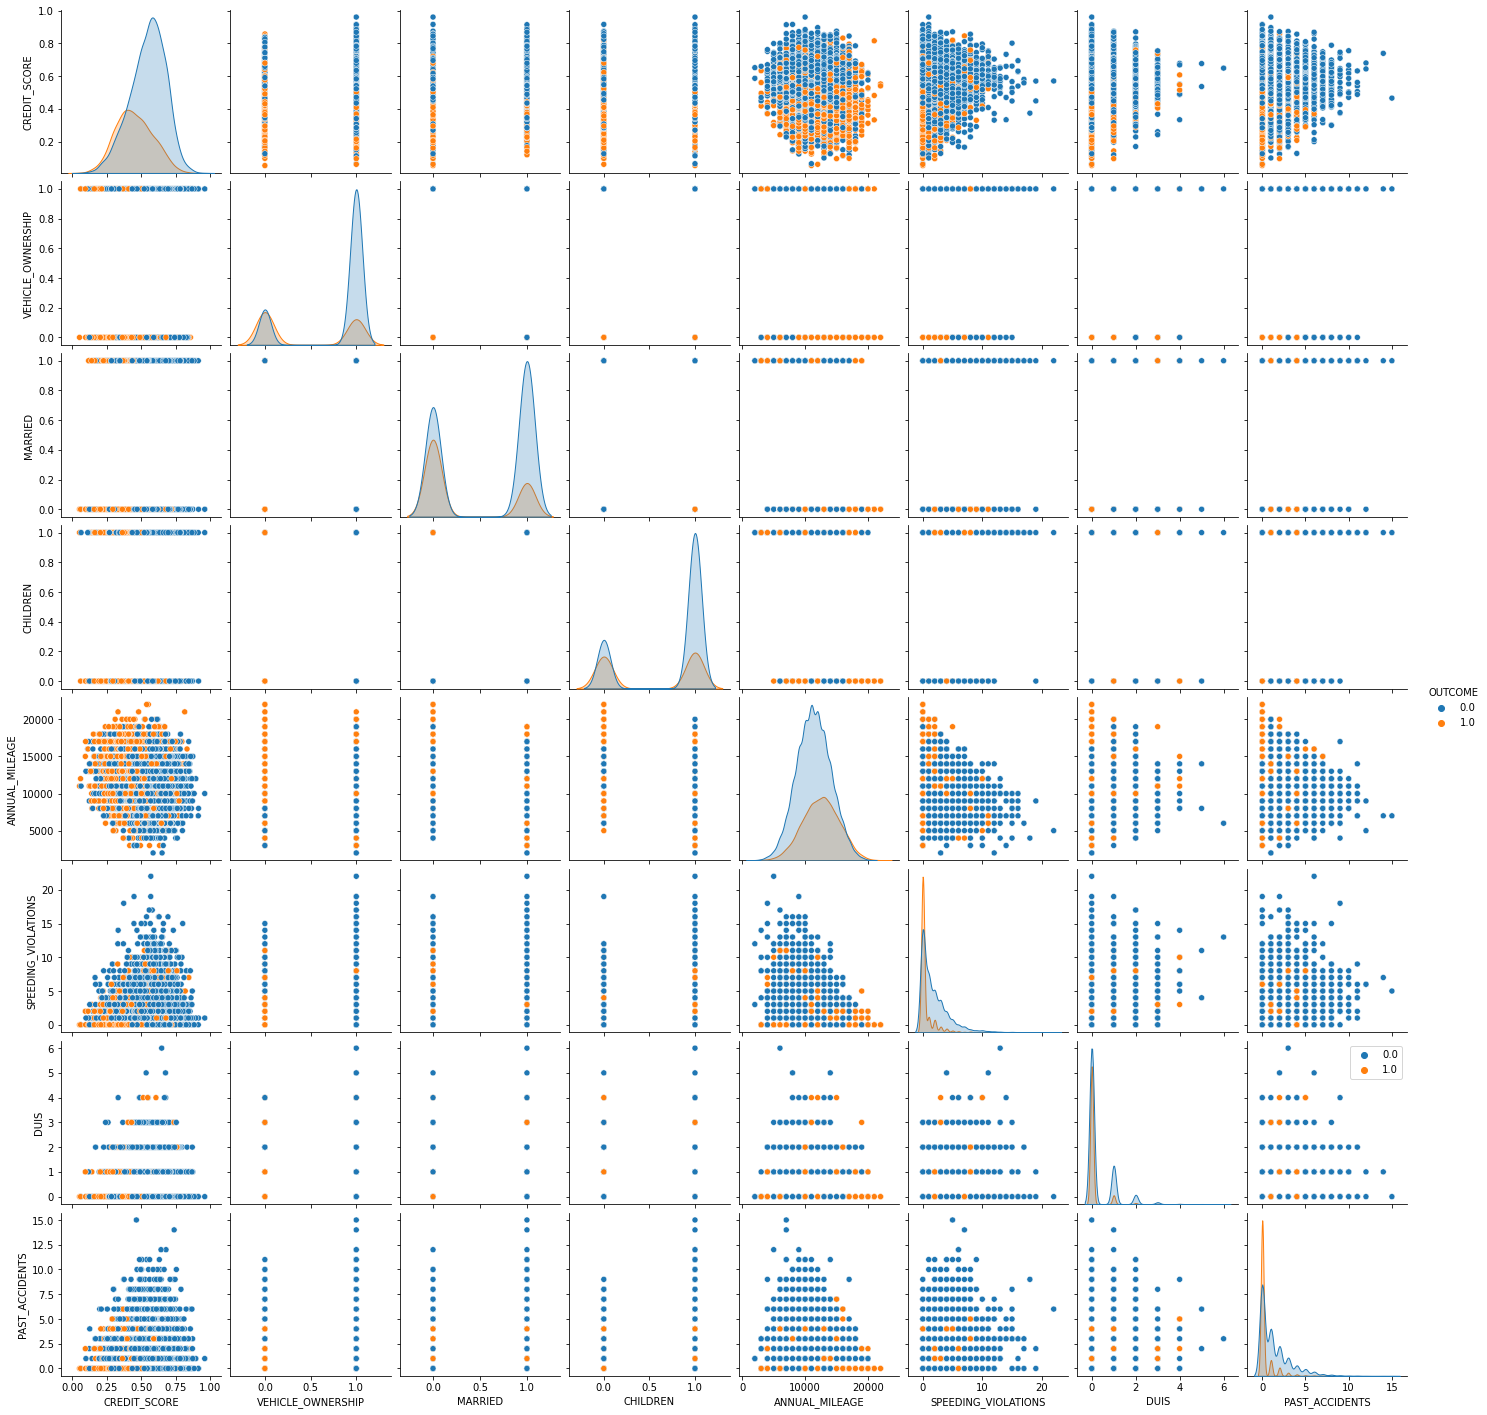

In [11]:
sns.pairplot(data, hue='OUTCOME')
plt.legend()
pass

Можно сделать вывод, что очевидной корреляции между параметрами нет

In [12]:
data.corr()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
CREDIT_SCORE,1.000000,0.312037,0.281238,0.220658,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.312037,1.000000,0.175626,0.125990,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.281238,0.175626,1.000000,0.287009,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.220658,0.125990,0.287009,1.000000,-0.447655,0.220415,0.115354,0.206295,-0.232835
ANNUAL_MILEAGE,-0.174453,-0.097433,-0.462193,-0.447655,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.204542,0.133868,0.218855,0.220415,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.127366,0.086567,0.120840,0.115354,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.180978,0.119521,0.215269,0.206295,-0.195217,0.443074,0.259359,1.000000,-0.311495
OUTCOME,-0.325286,-0.378921,-0.262104,-0.232835,0.187154,-0.291862,-0.189352,-0.311495,1.000000


Построим таблицу корреляции данных:

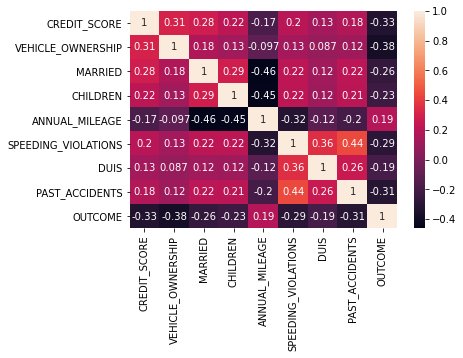

In [13]:
ax = sns.heatmap(data.corr(), annot=True)

Здесь можно увидеть достаточно заметную взаимную корреляцию между превышением скорости, вождением в нетрезвом виде и числом аварий. Это выглядит абсолютно логично. В общем корреляция по признакам не превышает 0,5.

# Обработка пропущенных значений

Найдем столбцы, в которых имеются пропущенные значения и количество таких значений:

In [14]:
data.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Видим, что признаки "CREDIT_SCORE" и "ANNUAL_MILEAGE" имеют пропущенные значения. Это количественные признаки, поэтому заполним пропущенные значения медианой:

In [15]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

# Обработка категориальных признаков

Для дальнейшей обработки данных закодируем категориальные признаки с помощью числовых.
К небинарным признакам 'AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','VEHICLE_TYPE' применим метод бинаризации (one-hot encoding). Затем удалим ненужные столбцы.

In [16]:
cat_cols = ['AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','VEHICLE_TYPE']

data_dummies = pd.concat([pd.get_dummies(data[col], prefix=col, drop_first=True) for col in cat_cols], axis=1)
data_onehot = pd.concat([data_dummies, data], axis=1)

for col in cat_cols:
    del data_onehot[col]

data_onehot

,AGE_26-39,AGE_40-64,AGE_65+,GENDER_male,RACE_minority,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,...,VEHICLE_TYPE_sports car,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,0,1,0,0,0,0,0,0,0,...,0,0.629027,1.0,0.0,1.0,12000.0,0,0,0,0.0
1,0,0,0,1,0,0,0,0,1,0,...,0,0.357757,0.0,0.0,0.0,16000.0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0.493146,1.0,0.0,0.0,11000.0,0,0,0,0.0
3,0,0,0,1,0,0,0,0,0,1,...,0,0.206013,1.0,0.0,1.0,11000.0,0,0,0,0.0
4,1,0,0,1,0,1,0,0,1,0,...,0,0.388366,1.0,0.0,0.0,12000.0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,1,0,0,0,1,...,0,0.582787,1.0,0.0,0.0,16000.0,0,0,1,0.0
9996,1,0,0,0,0,1,0,0,1,0,...,0,0.522231,1.0,0.0,1.0,12000.0,1,0,0,0.0
9997,1,0,0,1,0,0,0,0,0,0,...,0,0.470940,1.0,0.0,1.0,14000.0,0,0,0,0.0
9998,1,0,0,0,0,1,0,0,0,0,...,0,0.364185,0.0,0.0,1.0,13000.0,2,0,1,1.0


Равномерно разобьем данные по критерию 'OUTCOME' на обучающую и тестовую выборку в пропорции 4:1 (80% обучающей выборки, 20% - тестовой).

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data_onehot, data_onehot['OUTCOME']):
    strat_train_set = data_onehot.loc[train_index]
    strat_test_set = data_onehot.loc[test_index]

In [18]:
X_strat_train_set = strat_train_set.drop('OUTCOME', axis = 1)
Y_strat_train_set = strat_train_set['OUTCOME'].copy()

X_strat_test_set = strat_test_set.drop('OUTCOME', axis = 1)
Y_strat_test_set = strat_test_set['OUTCOME'].copy()

# Нормализация признаков

Нормализация (normalization) и стандартизация (standardization) являются методами изменения диапазонов значений – шкалирования. Разные атрибуты могут измеряться в разных диапазонах, или значения одного атрибута варьируются слишком сильно. Например, один атрибут может имеет диапазон от 0 до 1, а второй — от 1 до 1000. Тогда второй атрибут оказывает большее влияние на обучение, хотя не факт, что он является более важным, чем первый.

 - Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения,

 - Стандартизация изменяет форму распределения данных (приводится к нормальному распределению).

В дальнейшем мы будем использовать алгоритм k ближайших соседей, основанный на измерении расстояний, в таких случаях лучше применять стандартизацию. Выполним стандартизацию всех признаков:

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', MinMaxScaler()),
 ])

In [20]:
X_strat_train_set = num_pipeline.fit_transform(X_strat_train_set)
X_strat_test_set = num_pipeline.fit_transform(X_strat_test_set)

# Классификатор

Проведем обучение с помощью k-nearest neighbors algorithm (k-NN) и вычислим ошибки на тестовой выборке:

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_strat_train_set, Y_strat_train_set)

KNeighborsClassifier(n_neighbors=10)

In [22]:
Y_test_predict = knn.predict(X_strat_test_set)

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_strat_test_set, Y_test_predict)

array([[1231,  142],
       [ 234,  393]], dtype=int64)

In [24]:
np.mean(Y_strat_test_set != Y_test_predict)

0.188

Путем подбора оптимальных параметров метода и предварительной обработки данных, был получен процент ошибок на тестовой выборке: 18.8%.

Сравним результат с классификатором RandomForestClassifier.

In [25]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_strat_train_set, Y_strat_train_set)


RandomForestClassifier(n_estimators=1000)

In [26]:
Y_test_predict = rf.predict(X_strat_test_set)

In [27]:
confusion_matrix(Y_strat_test_set, Y_test_predict)

array([[1219,  154],
       [ 203,  424]], dtype=int64)

In [28]:
np.mean(Y_strat_test_set != Y_test_predict)

0.1785

Мы видим, что процент ошибок уменьшился и классификатор стал выдавать больше False результатов, что уменьшило число False negative результатов.

# Итоги

В наступлении страхового случая доля случайности велика и предсказать наверняка, наступит такой случай или нет невозможно. Это объясняет достаточно высокий процент ошибок(~18%). Кроме того, возможно, при составлении таблицы автор учел не все влияющие на исход признаки. Возможное улучшение результатов: расширение числа признаков.